**Daniel Yu**

Spring 2024

CS 252: Mathematical Data Analysis and Visualization

### Reminder: AI Policy

To improve the quality of your learning and out of fairness to your hardworking classmates, AI (e.g. ChatGPT, Copilot, etc.) should NOT be used in ANY way on this project and extensions. This includes both written analysis, plotting, and code. I will only grade your work, not an AI's. I will stop grading your project if I notice AI-generated content (in any capacity).

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

plt.style.use(['seaborn-v0_8-colorblind', 'seaborn-v0_8-darkgrid'])
plt.show()
plt.rcParams.update({'font.size': 14})

np.set_printoptions(suppress=True, precision=5)

# Automatically reload external modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Project 5 | Singular Value Decomposition and Recommender Systems

## Task 1: Principal Component Analysis with the SVD

The goal of this task is to leverage the singular value decomposition (SVD) from linear algebra to implement PCA in a different way. You will compare the quality of fit achieved with your new SVD-based PCA and existing covariance matrix based PCA on the brain dataset.

### 1a. Copy over files from previous projects

1. Copy `pca.py` from your PCA project.
2. Copy `data_transformations.py` from your PCA project.
3. Copy `brain.csv` and `brain_var_names.txt` from you Linear Regression project into your data subfolder of this project.

### 1b. Implement PCA fit with the SVD

Implement the `PCA_SVD` class in `pca_svd.py`. The only method you should need to override/write here is `fit`.

### 1c. Load in brain dataset

In the cell below, load in the brain dataset as a Pandas DataFrame along with the variable string names as an ndarray (or list).

In [20]:
df_brain = pd.read_csv('data/brain.csv')
brain_var_names = list(np.genfromtxt('data/brain_var_names.txt', delimiter = ",", dtype=str))

print(f'The shape of the brain dataset is {df_brain.shape} and should be (60, 62)')
print(f'The number of the brain variables is {len(brain_var_names)} and should be 62.')
print(f'The first variable name is {brain_var_names[0]} and should be 1')
print(f'The last variable name is {brain_var_names[-1]} and should be 17.6')

The shape of the brain dataset is (60, 62) and should be (60, 62)
The number of the brain variables is 62 and should be 62.
The first variable name is 1 and should be 1
The last variable name is 17.6 and should be 17.6


### 1d. Compare fit obtained with both PCA methods

Fit PCA to the brain dataset using your covariance-based and SVD-based PCA implementations. Create two "high quality" elbow plots showing the cumulative variance accounted for, one for the covariance-based approach, one for the SVD-based approach.

In [21]:
import time
from pca import PCA
from pca_svd import PCA_SVD

Elapsed Time: 0.004915952682495117


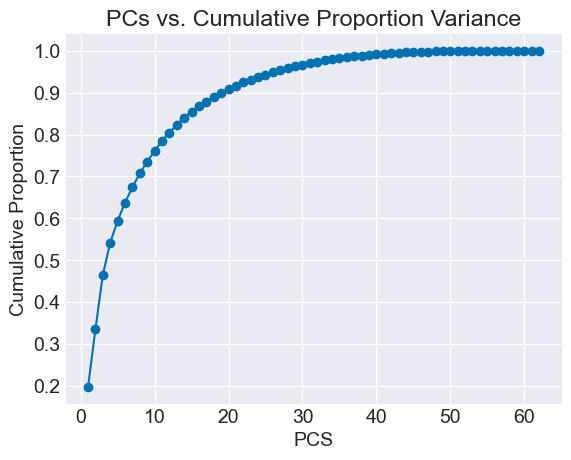

In [38]:
start_time = time.time()
brain_pca = PCA(df_brain)
brain_pca.fit(brain_var_names)
end_time = time.time()
print('Elapsed Time:', end_time - start_time)
brain_pca.elbow_plot()
plt.show()

Elapsed Time: 0.010964393615722656


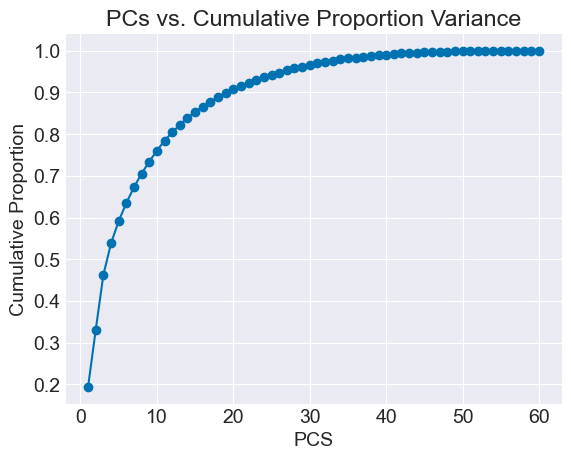

In [39]:
start_time = time.time()
brain_pca_svd = PCA_SVD(df_brain)
brain_pca_svd.fit(brain_var_names)
end_time = time.time()
print('Elapsed Time:', end_time - start_time)
brain_pca_svd.elbow_plot()
plt.show()

### 1e. Questions

**Question 1:** Use the `time` module to time the runtime of each method for computing PCA. Which method is faster?

**Question 2:** Print out the eigenvalues for both your PCA implementations. Pay close attention to the eigenvalues that correspond to the PCs with "high numbers". What do you think is going on, how does this relate to anything you noticed while fitting `pca`, and which approach appears to be doing a better job?

**Question 3:** Print out the difference in the sum of the absolute eigenvectors from your PCA implementations. Place the covariance-based eigenvectors on the left-hand side of the subtraction and the SVD-based eigenvectors on the right-hand side. What does the resulting scalar mean?

**Answer 1:** SVD is slightly slower, but that's what we discussed in class so it's expected because we're doing a little more computation. However, there's a tradeoff in that we can apply this to complex matricies.

**Answer 2:** Both methods produce similar high eigenvalues, so they capture the primary variances well. 
However, there are slight differences in the eigenvalues in that it looks like they cut down on some PCAs made in the covariance based PCA. In the first list, they have some eigenvalues with the value 0, which is odd and unecessary. So it looks like SVD is doing a better job..

**Answer 3:* The difference in the sum of absolute eigenvectors is a scalar that represents the discrepancy between the two PCA methods' principal components. Since the difference is positive it suggests that SVD is capturing more variance or representing the data more efficiently compared to the covariance-based PCA. This aligns with the observed eigenvalues, where the SVD-based PCA has slightly higher values..*

In [41]:
# 1
start_time = time.time()
brain_pca = PCA(df_brain)
brain_pca.fit(brain_var_names)
end_time = time.time()
print('Elapsed Time (PCA):', end_time - start_time)

start_time = time.time()
brain_pca_svd = PCA_SVD(df_brain)
brain_pca_svd.fit(brain_var_names)
end_time = time.time()
print('Elapsed Time (SVD):', end_time - start_time)

Elapsed Time (PCA): 0.0043027400970458984
Elapsed Time (SVD): 0.005979061126708984


In [34]:
# 2
print("Eigenvalues for covariance-based PCA:")
print(brain_pca.e_vals)

print("\nEigenvalues for SVD-based PCA:")
print(brain_pca_svd.e_vals)

Eigenvalues for covariance-based PCA:
[19463.66731 13633.97768 12804.42592  7539.47832  5101.91675  4320.96473
  3628.06813  3252.27191  2752.54395  2513.5132   2378.23136  1964.25841
  1840.93696  1701.52504  1346.39963  1274.97007  1115.19557  1090.13512
  1041.96044   873.26912   789.75273   758.75313   657.67679   613.55107
   551.88548   524.16416   505.22545   456.41026   439.22766   419.25201
   335.87      326.89574   313.14769   282.86607   246.68363   216.2121
   202.35398   184.4693    172.95125   140.54362   134.3406    117.30215
    95.21954    91.46933    73.94417    62.86716    56.5821     48.14785
    40.28665    31.08631    25.02826    20.45147    16.24562     9.38871
     8.71157     3.65262     1.79518     0.39266     0.31914     0.
    -0.         -0.     ]

Eigenvalues for SVD-based PCA:
[19463.77359 13689.00298 13170.31163  7546.44994  5360.89727  4321.05412
  3786.21473  3289.91238  2879.34683  2616.63484  2416.38732  1964.64448
  1847.18861  1709.87257  1357.472

In [42]:
# 3
diff_sum_abs_eigenvectors = np.sum(np.abs(brain_pca.e_vecs)) - np.sum(np.abs(brain_pca_svd.e_vecs))
print(diff_sum_abs_eigenvectors)

13.304374699880952
